## ДЗ №2 по ML  
# С помощью LightAutoML предсказать параметр MEDV из housing.csv   

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, precision_recall_curve
from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
from lightautoml.tasks import Task

In [10]:
RANDOM_STATE = 777

In [66]:
df = pd.read_csv('housing.csv')

In [4]:
df.tail(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [67]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=RANDOM_STATE)

In [68]:
y_train = df_train['MEDV']
y_test = df_test['MEDV']

In [70]:
task = Task(name='reg' ) # здесь задается тип решаемой задачи
roles = {'target': 'MEDV'} # здесь задается название целевого признака - target в нашем случае
automl = TabularAutoML(task=task, timeout=3600, memory_limit=10) # здесь создаем объект черной коробки LightAutoML
oof_pred = automl.fit_predict(df_train, roles=roles)

In [71]:
df_test = df_test.drop('MEDV',axis=1)
df_train = df_train.drop('MEDV',axis=1)

In [72]:
y_train_score = automl.predict(df_train).data
y_test_score = automl.predict(df_test).data

In [73]:
df_test['predict'] =  automl.predict(df_test).data
df_test['MEDV'] = df['MEDV']
res_df_ML = df_test[['predict', 'MEDV']].sort_values(by='MEDV').reset_index().copy()
res_df_ML

,index,predict,MEDV
0,398,6.782851,5.0
1,425,9.601877,8.3
2,437,8.773918,8.7
3,429,11.213795,9.5
4,436,12.282064,9.6
...,...,...,...
97,256,40.687393,44.0
98,224,44.473495,44.8
99,262,47.119625,48.8
100,161,46.927650,50.0


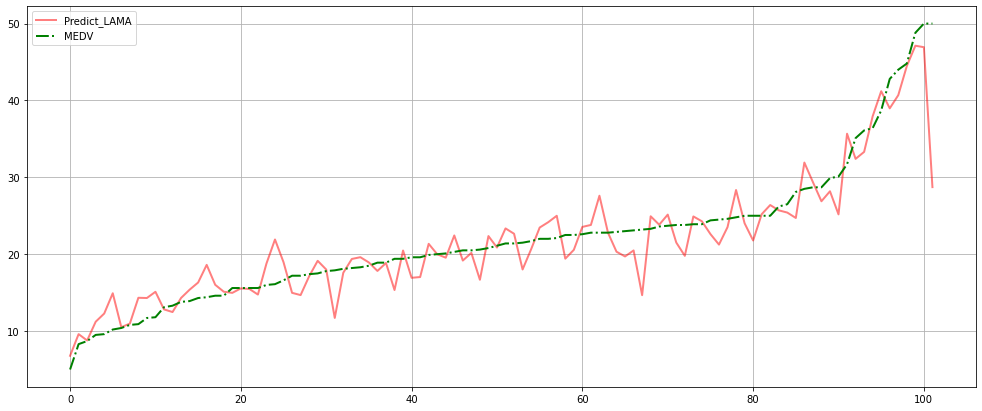

In [74]:
%matplotlib inline

plt.figure(figsize=(17, 7))
plt.plot(res_df_ML.index, res_df_ML['predict'], '-r', alpha=0.5, label="Predict_LAMA", mec='b', lw=2, mew=2)
plt.plot(res_df_ML.index, res_df_ML['MEDV'], '-.g', label="MEDV", mec='r', lw=2, mew=2)
plt.legend()
plt.grid(True)

In [75]:
automl.get_feature_scores()

,Feature,Importance
0,RM,605282.645781
1,LSTAT,376985.103681
2,DIS,59528.353199
3,PTRATIO,38202.987455
4,NOX,34375.056453
5,CRIM,27793.979922
6,AGE,21602.957363
7,B,14470.869557
8,TAX,11976.447434
9,INDUS,10558.718876


# С помощью модели линейной регрессии

In [40]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('MEDV', axis = 1), 
                                                    df['MEDV'], 
                                                    test_size = 0.2,
                                                   random_state = RANDOM_STATE)

In [41]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [42]:
pred = model.predict(X_test)
pred

array([17.67304212, 10.09909252, 13.52545353, 22.18570151, 33.7382297 ,
       19.83343574, 15.33130736, 36.57039405, 11.19697845, 35.76915861,
       29.46705509, 28.43467482, 12.9428006 , 20.49916673, 19.19303086,
       32.9347353 ,  6.13945601, 23.50255633, 25.35292679, 17.33756497,
       17.65933625, 20.80731653,  7.08246442, 27.54506257, 16.87178573,
       25.81466441, 25.0561993 , 31.62430116, 23.65290269, 23.26200486,
       27.67499036, 29.88691035, 26.51554644, 28.7762615 , 26.20660028,
       30.58442896, 13.17196501, 27.33221695, 17.95292852, 19.91763174,
       22.36265093, 18.31926318,  7.61133361, 19.65826221, 15.62114398,
       23.5527228 , 11.23274588, 24.12337791, 17.13727998, 19.99907932,
       31.02538376, 35.57620729, 17.06454272, 20.65021153, 19.6016809 ,
       25.47020783, 22.46820989, 15.55914968, 29.32283516, 16.94875856,
       25.41945595, 17.65605247, 23.95102533, 14.62777011, 14.30085405,
       33.26535361, 29.32169277, 19.17393128, 27.44031202, 16.82

In [43]:
X_test['predict'] = pred
X_test['MEDV'] = df['MEDV']
res_df = X_test[['predict', 'MEDV']].sort_values(by='MEDV').reset_index().copy()

In [44]:
del res_df['index']
res_df

,predict,MEDV
0,6.139456,5.0
1,10.099093,8.3
2,8.715211,8.7
3,12.942801,9.5
4,14.627770,9.6
...,...,...
97,37.449793,44.0
98,38.205269,44.8
99,40.462655,48.8
100,36.570394,50.0


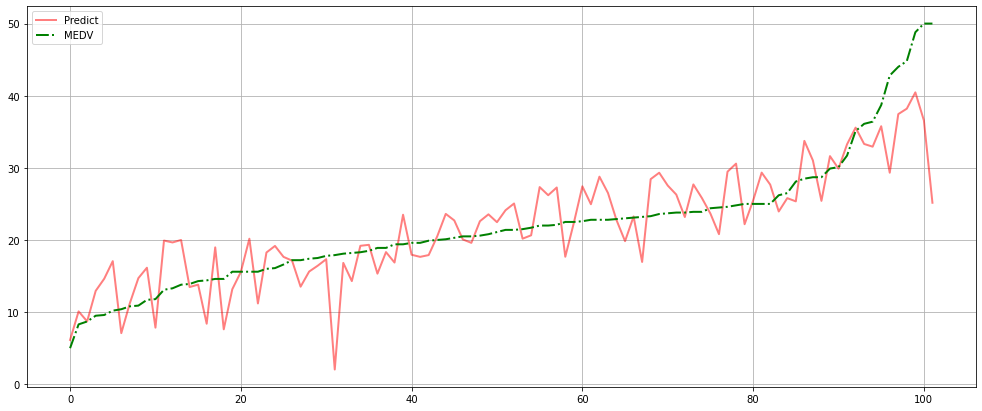

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(17, 7))
plt.plot(res_df.index, res_df['predict'], '-r', alpha=0.5, label="Predict", mec='b', lw=2, mew=2)
plt.plot(res_df.index, res_df['MEDV'], '-.g', label="MEDV", mec='r', lw=2, mew=2)
plt.legend()
plt.grid(True)

# С помощью деревьев

In [47]:
from sklearn.tree import DecisionTreeRegressor

In [48]:
df_tree = pd.read_csv('housing.csv')

In [49]:
X_train, X_test, y_train, y_test = train_test_split(df_tree.drop('MEDV', axis = 1), 
                                                    df_tree['MEDV'], 
                                                    test_size = 0.2,
                                                   random_state = RANDOM_STATE)

In [50]:
tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(X_train,y_train)
predict_tree = tree_regressor.predict(X_test)
predict_tree

array([19.3, 11.8, 13.8, 22. , 32. , 19.6, 20.3, 46.7, 13.4, 50. , 29.1,
       22. , 11.8, 19.7, 21.2, 34.9,  6.3, 21.7, 25. , 18.8, 14.5, 21.8,
        8.5, 24.4, 17.8, 20.5, 20.6, 30.1, 25. , 17.5, 24.7, 23.7, 27.5,
       30.5, 26.6, 26.6, 14.1, 22.2, 15.3, 17.8, 17.2, 27.1, 17.8, 10.2,
       16.2, 19.8, 11.8, 21.2, 16.3, 16.7, 23.6, 31.1, 19.1, 23.1, 24.5,
       22.3, 17.2, 17.8, 22.2, 12.7, 25. , 21.5, 28. , 14.9, 19.9, 31.5,
       35.2, 20.3, 22. , 15.2, 22.8, 14.4, 21.7, 19.9, 12.7, 16.7, 50. ,
       21.2, 50. , 25.2, 11.9, 16.7, 50. , 16.2, 16.5, 26.7, 17. , 20.8,
       21.5, 11.8, 27.5, 22. , 22.3, 42.3, 19.5, 19.5, 20.4, 16.2, 16.7,
       33.2, 25.2, 16.3])

In [51]:
X_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [52]:
tree_regressor.feature_importances_

array([4.36474272e-02, 1.87942891e-05, 3.10501549e-03, 3.79615947e-05,
       3.12468284e-02, 5.78564796e-01, 3.94025495e-03, 7.70823344e-02,
       1.97850271e-03, 1.46354282e-02, 2.57192516e-02, 4.62198789e-03,
       2.15401417e-01])

In [53]:
frame = {'Важность параметра':tree_regressor.feature_importances_, 'Фича':X_train.columns}
result = pd.DataFrame(frame).sort_values(by='Важность параметра', ascending=False)
result

,Важность параметра,Фича
5,0.578565,RM
12,0.215401,LSTAT
7,0.077082,DIS
0,0.043647,CRIM
4,0.031247,NOX
10,0.025719,PTRATIO
9,0.014635,TAX
11,0.004622,B
6,0.003940,AGE
2,0.003105,INDUS


In [54]:
df_tree.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [55]:
X_test['predict'] = predict_tree
X_test['MEDV'] = df_tree['MEDV']
res_df_tree = X_test[['predict', 'MEDV']].sort_values(by='MEDV').reset_index().copy()

In [56]:
del res_df_tree['index']
res_df_tree

,predict,MEDV
0,6.3,5.0
1,11.8,8.3
2,11.8,8.7
3,11.8,9.5
4,14.9,9.6
...,...,...
97,42.3,44.0
98,50.0,44.8
99,50.0,48.8
100,46.7,50.0


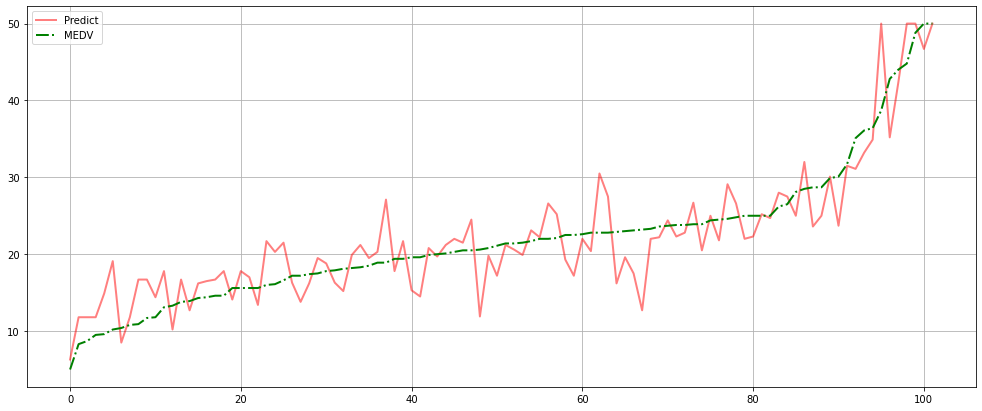

In [57]:
plt.figure(figsize=(17, 7))
plt.plot(res_df_tree.index, res_df_tree['predict'], '-r', alpha=0.5, label="Predict", mec='b', lw=2, mew=2)
plt.plot(res_df_tree.index, res_df_tree['MEDV'], '-.g', label="MEDV", mec='r', lw=2, mew=2)
plt.legend()
plt.grid(True)

# Сравнение результатов методом LinearRegression, DecisionTreeRegressor и LightAutoML

In [58]:
res_df_all = res_df.copy()
res_df_all['predict_tree'] = res_df_tree['predict']
res_df_all['predict_LAMA'] = res_df_ML['predict']
res_df_all

,predict,MEDV,predict_tree,predict_LAMA
0,6.139456,5.0,6.3,6.782851
1,10.099093,8.3,11.8,9.601877
2,8.715211,8.7,11.8,8.773918
3,12.942801,9.5,11.8,11.213795
4,14.627770,9.6,14.9,12.282064
...,...,...,...,...
97,37.449793,44.0,42.3,40.687393
98,38.205269,44.8,50.0,44.473495
99,40.462655,48.8,50.0,47.119625
100,36.570394,50.0,46.7,46.927650


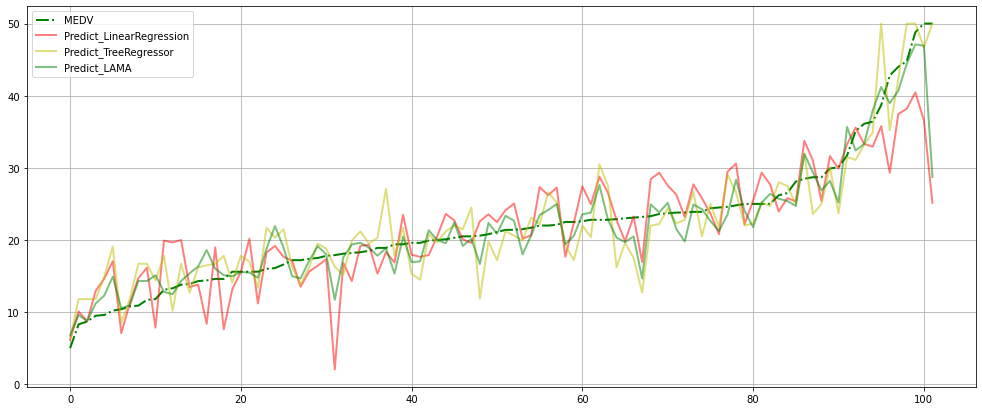

In [61]:
plt.figure(figsize=(17, 7))
plt.plot(res_df_all.index, res_df_all['MEDV'], '-.g', label="MEDV", mec='r', lw=2, mew=2)
plt.plot(res_df_all.index, res_df_all['predict'], '-r', alpha=0.5, label="Predict_LinearRegression", mec='b', lw=2, mew=2)
plt.plot(res_df_all.index, res_df_all['predict_tree'], '-y', alpha=0.5, label="Predict_TreeRegressor", mec='y', lw=2, mew=2)
plt.plot(res_df_all.index, res_df_all['predict_LAMA'], '-g', alpha=0.5, label="Predict_LAMA", mec='y', lw=2, mew=2)
plt.legend()
plt.grid(True)